 # <center> Baby Destination Assignment Project-2(part-2) </center>
 
Daily Data: Daily data given for likes, reach, engaged user and impression.

Calculate 30-day rolling average of the reach and impression data. Plot a chart of reach and impression against date.


<h1> Table of Content </h1>

<ol>
        <li><a href="#ref1">Import Required libraries</a></li>
        <li><a href="#ref2">Acquiring the Data</a></li>
        <li><a href="#ref3">Preprocessing</a></li>
        <li><a href="#ref4">Calculate 30-day rolling average of the reach and impression data. Plot a chart of reach and impression against date.</a></li>
</ol>

<a id="ref1"></a>
## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id="ref2"></a>
## 2. Acquiring the Data

Lets import the Daily Data sheet from the excel file

In [2]:
df1=pd.read_excel(r"C:\Users\user\Downloads\Reporting Assignment.xlsx",sheet_name="Daily Data",skiprows=1)

#### 2.1 Read first 5 rows from the dataset

In [3]:
df1.head()

,Date,Likes,Engaged users,reach,impressions
0,2015-09-11 00:00:00,45,24,212,573
1,2015-10-11 00:00:00,105,176,2619,7138
2,2015-11-11 00:00:00,137,163,2700,4088
3,2015-12-11 00:00:00,154,212,3428,6565
4,11/13/15,148,220,3624,6133


#### 2.2 Check the size of the dataset

In [4]:
df1.shape

(539, 5)

<a id="ref3"></a>
## 3. Preprocessing

#### 3.1 lets seperate the Date from "Date Posted" column using pandas DatetimeIndex function to keep it in the same format

In [5]:
df1["Date"]=pd.DatetimeIndex(df1["Date"]).date
df1.head()

,Date,Likes,Engaged users,reach,impressions
0,2015-09-11,45,24,212,573
1,2015-10-11,105,176,2619,7138
2,2015-11-11,137,163,2700,4088
3,2015-12-11,154,212,3428,6565
4,2015-11-13,148,220,3624,6133


#### 3.2 Lets set date as index

In [6]:
df1=df1.set_index("Date")
df1.head()

,Likes,Engaged users,reach,impressions
Date,,,,
2015-09-11,45,24,212,573
2015-10-11,105,176,2619,7138
2015-11-11,137,163,2700,4088
2015-12-11,154,212,3428,6565
2015-11-13,148,220,3624,6133


#### 3.3 lets drop likes and engaged users column as we need anly Date, reach and impressions

In [7]:
df1=df1.drop(["Likes","Engaged users"], axis=1)
df1.head()

,reach,impressions
Date,,
2015-09-11,212,573
2015-10-11,2619,7138
2015-11-11,2700,4088
2015-12-11,3428,6565
2015-11-13,3624,6133


<a id="ref4"></a>
## 4. Calculate 30-day rolling average of the reach and impression data. Plot a chart of reach and impression against date.

#### 4.1 Lets create a plot for reach and impression against date from the above data set

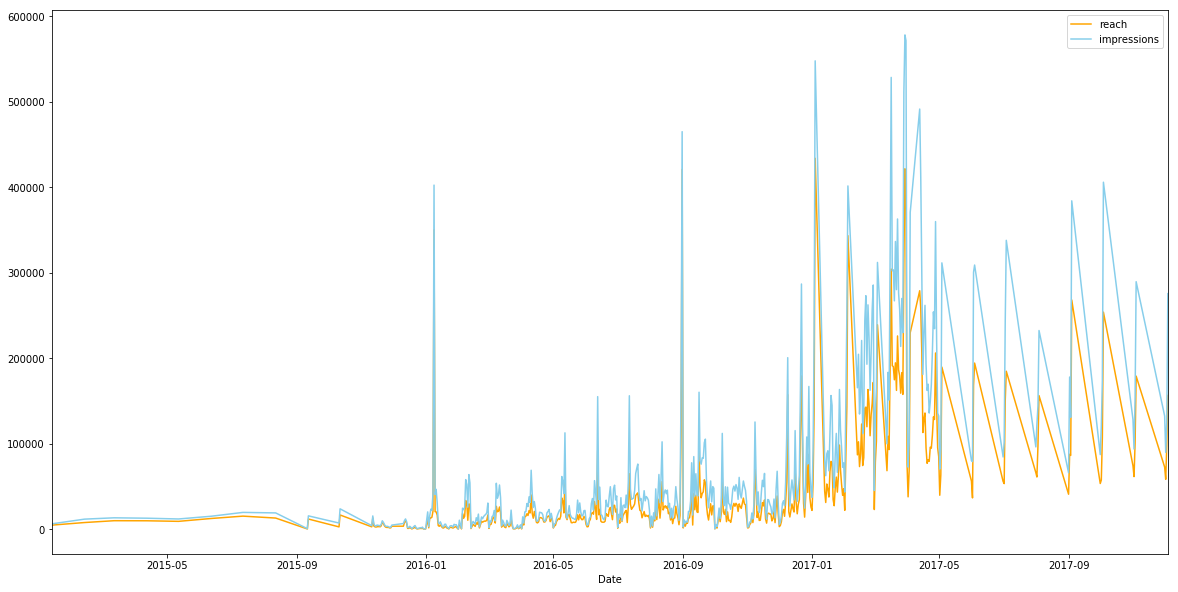

In [8]:
df1.plot(kind="line",figsize=(20,10),color=("orange","skyblue"))

#### 4.2 Calculate 30 days rolling average of reach and impressions ,add 2 new columns for avg  

In [9]:
df1["Avg_reach"]=df1.reach.rolling(30).mean().fillna(0)
df1["Avg_impressions"]=df1.impressions.rolling(30).mean().fillna(0)
df1.head()

,reach,impressions,Avg_reach,Avg_impressions
Date,,,,
2015-09-11,212,573,0.0,0.0
2015-10-11,2619,7138,0.0,0.0
2015-11-11,2700,4088,0.0,0.0
2015-12-11,3428,6565,0.0,0.0
2015-11-13,3624,6133,0.0,0.0


#### 4.3 Create plot for the reach , impressions and their 30 days rolling average againts date

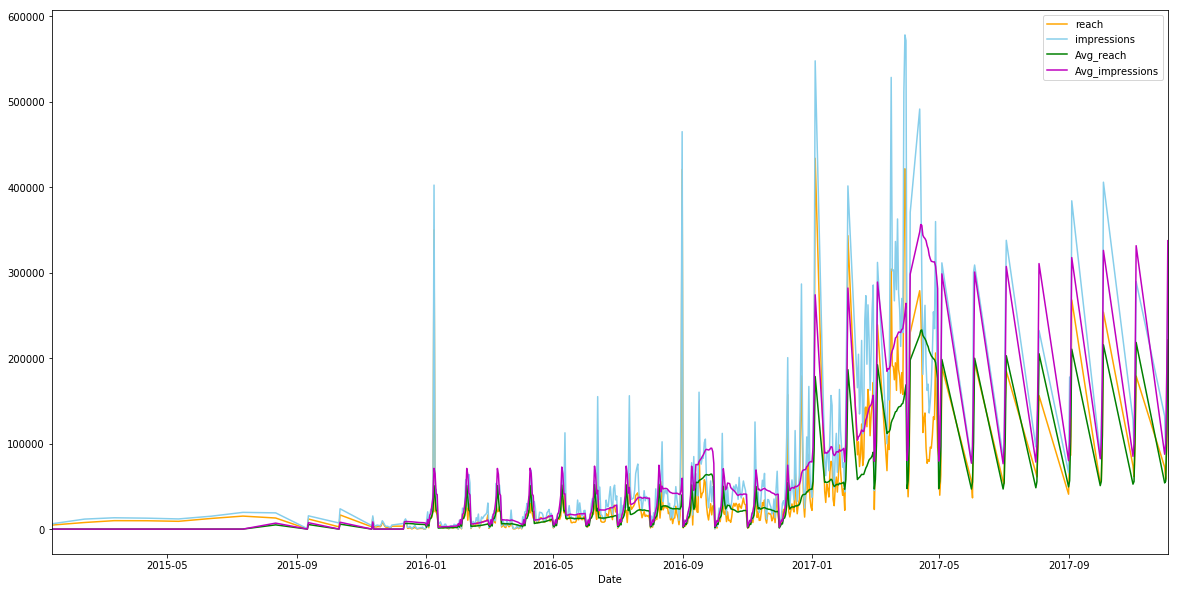

In [10]:
df1.plot(kind="line",figsize=(20,10),color=("orange","skyblue","g","m"))

#### 4.4 Create a new dataframe for Average reach and impressions, so lets drop the reach and impressions

In [11]:
df1_Avg=df1.drop(["reach","impressions"],axis=1)
df1_Avg.head()

,Avg_reach,Avg_impressions
Date,,
2015-09-11,0.0,0.0
2015-10-11,0.0,0.0
2015-11-11,0.0,0.0
2015-12-11,0.0,0.0
2015-11-13,0.0,0.0


#### 4.5 Create plot for Average reach and impressions against date

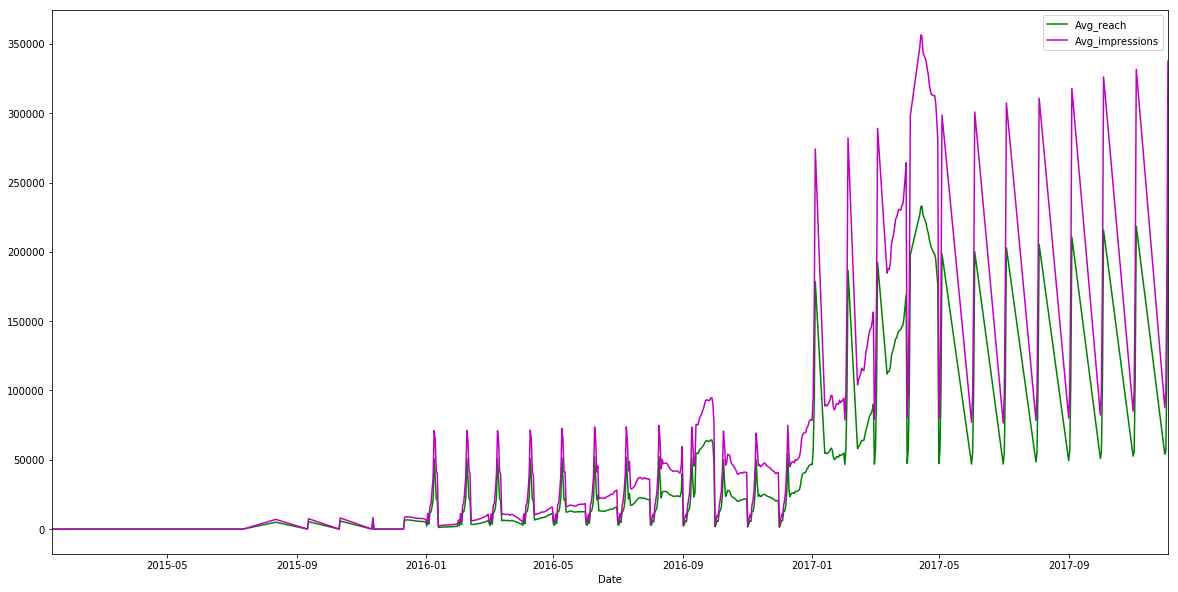

In [12]:
df1_Avg.plot(figsize=(20,10),color=("g","m"))